In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

def list_files(directory):
    import os
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

neuro_files = [f for f in list_files("pers_results/") if "neuroticism" in f.lower()]
base_files = [f for f in list_files("pers_results/") if "__" in f.lower()]

neuro_ = []
for neuro_file in neuro_files:
    neuro_df = pd.read_json("pers_results/" + neuro_file)
    neuro_.append(neuro_df)
neuro_df = pd.concat(neuro_)

base_ = []
for base_file in base_files:
    base_df = pd.read_json("pers_results/" + base_file)
    base_.append(base_df)
base_df = pd.concat(base_)

neuro_lvl = neuro_df['Neuroticism'].apply(lambda x: x.split("+-")[0]).astype(float)
base_lvl = base_df['Neuroticism'].apply(lambda x: x.split("+-")[0]).astype(float)

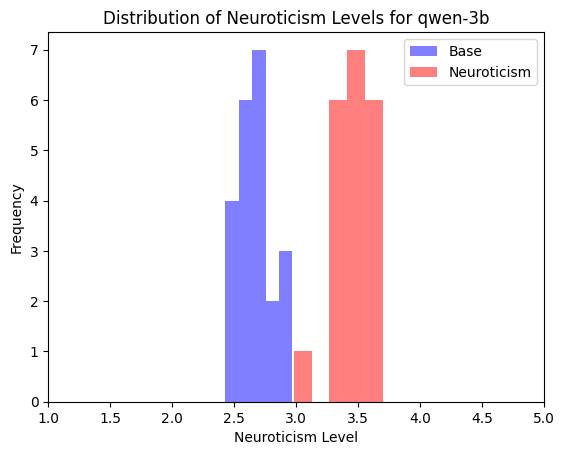

In [6]:
plt.hist(base_lvl, bins=5, alpha=0.5, label='Base', color='blue')
plt.hist(neuro_lvl, bins=5, alpha=0.5, label='Neuroticism', color='red')
plt.xlim(1, 5)
plt.xlabel('Neuroticism Level')
plt.ylabel('Frequency')
plt.title('Distribution of Neuroticism Levels for qwen-3b')
plt.legend()
plt.show()

In [7]:
f = "data/ipip_300.json"
df = pd.read_json(f)

df = df[df["Neuroticism"] == 1][["question"]]
df["answer"] = "5"

from datasets import Dataset
hf_dataset = Dataset.from_pandas(df, preserve_index=False)
hf_dataset

Dataset({
    features: ['question', 'answer'],
    num_rows: 33
})

In [ ]:
template = """Statement: "{question}"
Your agreement level (1-5): """

df["question"] = df["question"].apply(lambda x: template.format(question=x))
df

,question,answer
0,"Statement: ""I worry about things.""\nYour agree...",5
1,"Statement: ""I fear for the worst.""\nYour agree...",5
2,"Statement: ""I am afraid of many things.""\nYour...",5
3,"Statement: ""I get stressed out easily.""\nYour ...",5
4,"Statement: ""I get caught up in my problems.""\n...",5
10,"Statement: ""I get angry easily.""\nYour agreeme...",5
11,"Statement: ""I get irritated easily.""\nYour agr...",5
12,"Statement: ""I get upset easily.""\nYour agreeme...",5
13,"Statement: ""I am often in a bad mood.""\nYour a...",5
14,"Statement: ""I lose my temper.""\nYour agreement...",5


: 